In [7]:
from PIL import Image
import os
import sys
import numpy as np
import time
from sklearn import svm
from sklearn.externals import joblib

In [11]:
#get images from assigned path
def get_file_list(path):
    return [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".png")]

#get the name of images
def get_img_name_str(imgPath):
    return imgPath.split(os.path.sep)[-1]

#turn the image into a numpy vector
#turn into grayscale image and each pixel is represented by 8 bits
def img2vector(imgFile):
    img = Image.open(imgFile).convert('L')
    img_arr = np.array(img, 'i')
    img_normalization = np.round(img_arr / 255)
    img_arr2 = np.reshape(img_normalization, (1, -1))
    return img_arr2

#read one number and convert it into a vector
def read_and_convert(imgFileList):
    dataLabel = [] 
    dataNum = len(imgFileList)
    dataMat = np.zeros((dataNum, 400))
    for i in range(dataNum):
        imgNameStr = imgFileList[i]
        #get what number is it
        imgName = get_img_name_str(imgNameStr)
        classTag = imgName.split(".")[0].split("_")[0] 
        dataLabel.append(classTag)
        dataMat[i, :] = img2vector(imgNameStr)
    return dataMat, dataLabel

#read data from 0 to 9
def read_all_data():
    cName = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
    path = sys.path[1]
    print('0')
    flist = get_file_list(train_data_path)
    dataMat, dataLabel = read_and_convert(flist)
    for c in cName:
        print(c)
        train_data_path = os.path.join(path, '/Users/karro/Data/train/') + c
        flist_ = get_file_list(train_data_path)
        dataMat_, dataLabel_ = read_and_convert(flist_)
        dataMat = np.concatenate((dataMat, dataMat_), axis=0)
        dataLabel = np.concatenate((dataLabel, dataLabel_), axis=0)
    return dataMat, dataLabel

# create the svm model
def create_svm(dataMat, dataLabel,path,decision='ovr'):
    clf = svm.SVC(decision_function_shape=decision)
    rf =clf.fit(dataMat, dataLabel)
    joblib.dump(rf, path)
    print("success")
    return clf

In [ ]:
if __name__ == '__main__':
    st = time.clock()
    dataMat, dataLabel = read_all_data()
    path = sys.path[1]
    model_path=os.path.join(path,'/Users/karro/model/svm.model')
    create_svm(dataMat, dataLabel,model_path, decision='ovr')
    et = time.clock()
    print("Training spent {:.4f}s.".format((et - st)))

In [10]:
test_dataMat_shape = []
test_dataLabel_len = []
test_time_spent = []
test_errCount = []
test_computing_score_spent = []
test_score = []
test_error_rate = []

def svmtest(model_path):
    path = sys.path[1]
    tbasePath = os.path.join(path, "/Users/karro/Data/test/")
    tcName = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    tst = time.clock()
    allErrCount = 0
    allErrorRate = 0.0
    allScore = 0.0
    
    
    
    clf = joblib.load(model_path)
    for tcn in tcName:
        testPath = tbasePath + tcn

        tflist = get_file_list(testPath)

        tdataMat, tdataLabel = read_and_convert(tflist)
        print("test dataMat shape: {0}, test dataLabel len: {1} ".format(tdataMat.shape, len(tdataLabel)))
        test_dataMat_shape.append(tdataMat.shape)
        test_dataLabel_len.append(len(tdataLabel))
        

        pre_st = time.clock()
        preResult = clf.predict(tdataMat)
        pre_et = time.clock()
        print("Recognition  " + tcn + " spent {:.4f}s.".format((pre_et - pre_st)))
        test_time_spent.append(pre_et - pre_st)
        
        
        errCount = len([x for x in preResult if x != tcn])
        print("errorCount: {}.".format(errCount))
        test_errCount.append(errCount)
        
        allErrCount += errCount
        score_st = time.clock()
        score = clf.score(tdataMat, tdataLabel)
        score_et = time.clock()
        print("computing score spent {:.6f}s.".format(score_et - score_st))
        test_computing_score_spent.append(score_et - score_st)
        
        allScore += score
        print("score: {:.6f}.".format(score))
        test_score.append(score)
        
        print("error rate is {:.6f}.".format((1 - score)))
        test_error_rate.append(1 - score)

    tet = time.clock()
    print("Testing All class total spent {:.6f}s.".format(tet - tst))
    print("All error Count is: {}.".format(allErrCount))
    avgAccuracy = allScore / 10.0
    print("Average accuracy is: {:.6f}.".format(avgAccuracy))
    print("Average error rate is: {:.6f}.".format(1 - avgAccuracy))

In [12]:
#test
if __name__ == '__main__':
    path = sys.path[1]
    model_path=os.path.join(path,'/Users/karro/model/svm.model')
    svmtest(model_path)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


test dataMat shape: (980, 400), test dataLabel len: 980 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Recognition  0 spent 7.6520s.
errorCount: 11.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


computing score spent 7.692151s.
score: 0.988776.
error rate is 0.011224.
test dataMat shape: (1135, 400), test dataLabel len: 1135 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Recognition  1 spent 8.7196s.
errorCount: 11.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


computing score spent 8.693110s.
score: 0.990308.
error rate is 0.009692.
test dataMat shape: (1032, 400), test dataLabel len: 1032 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Recognition  2 spent 8.0713s.
errorCount: 57.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


computing score spent 8.126341s.
score: 0.944767.
error rate is 0.055233.
test dataMat shape: (1010, 400), test dataLabel len: 1010 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Recognition  3 spent 7.8407s.
errorCount: 55.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


computing score spent 7.807853s.
score: 0.945545.
error rate is 0.054455.
test dataMat shape: (982, 400), test dataLabel len: 982 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Recognition  4 spent 7.5204s.
errorCount: 44.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


computing score spent 7.386015s.
score: 0.955193.
error rate is 0.044807.
test dataMat shape: (892, 400), test dataLabel len: 892 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Recognition  5 spent 6.7248s.
errorCount: 70.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


computing score spent 6.710108s.
score: 0.921525.
error rate is 0.078475.
test dataMat shape: (958, 400), test dataLabel len: 958 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Recognition  6 spent 7.2074s.
errorCount: 27.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


computing score spent 7.217250s.
score: 0.971816.
error rate is 0.028184.
test dataMat shape: (1028, 400), test dataLabel len: 1028 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Recognition  7 spent 7.9543s.
errorCount: 66.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


computing score spent 7.822406s.
score: 0.935798.
error rate is 0.064202.
test dataMat shape: (974, 400), test dataLabel len: 974 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Recognition  8 spent 7.3287s.
errorCount: 75.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


computing score spent 7.319409s.
score: 0.922998.
error rate is 0.077002.
test dataMat shape: (1009, 400), test dataLabel len: 1009 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Recognition  9 spent 7.5908s.
errorCount: 79.
computing score spent 7.585281s.
score: 0.921705.
error rate is 0.078295.
Testing All class total spent 160.146085s.
All error Count is: 495.
Average accuracy is: 0.949843.
Average error rate is: 0.050157.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [13]:
print(test_dataMat_shape)
print(test_dataLabel_len)
print(test_time_spent)
print(test_errCount)
print(test_computing_score_spent)
print(test_score)
print(test_error_rate)

[(980, 400), (1135, 400), (1032, 400), (1010, 400), (982, 400), (892, 400), (958, 400), (1028, 400), (974, 400), (1009, 400)]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[7.65202, 8.719593, 8.071251000000004, 7.840716999999998, 7.520447000000004, 6.724840999999998, 7.207431, 7.954324, 7.328652000000005, 7.5908019999999965]
[11, 11, 57, 55, 44, 70, 27, 66, 75, 79]
[7.692150999999999, 8.69311, 8.126341000000004, 7.8078530000000015, 7.386015, 6.710107999999991, 7.217249999999993, 7.822406000000001, 7.319409000000007, 7.585281000000009]
[0.9887755102040816, 0.9903083700440528, 0.9447674418604651, 0.9455445544554455, 0.955193482688391, 0.92152466367713, 0.9718162839248434, 0.9357976653696498, 0.9229979466119097, 0.9217046580773043]
[0.011224489795918391, 0.00969162995594719, 0.05523255813953487, 0.054455445544554504, 0.044806517311609007, 0.07847533632286996, 0.028183716075156573, 0.06420233463035019, 0.0770020533880903, 0.07829534192269572]


In [1]:
import matplotlib.pyplot as plt

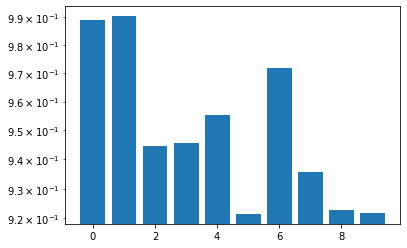

In [21]:
num=[0,1,2,3,4,5,6,7,8,9]
score=[0.9887755102040816, 
       0.9903083700440528, 
       0.9447674418604651,
       0.9455445544554455, 
       0.955193482688391, 
       0.92152466367713, 
       0.9718162839248434, 
       0.9357976653696498,  
       0.9229979466119097, 
       0.9217046580773043]
plt.bar(num,score,log=True)
plt.show()